In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import os

In [31]:
def print_trajectory(df, plant):
    if plant is True:
        img = plt.imread("C:/Users/diogo/Desktop/Tese/Dados/floorplan.png")
        fig, ax = plt.subplots()
        ax.imshow(img, extent=[0, 3136, 0, 2475])

    min_x = abs(min(df["x_floorplan"]))
    min_y = abs(min(df["y_floorplan"]))
    
    for cust_id in df["Customer_id"].unique():
        customer_data = df[df["Customer_id"] == cust_id]
        plt.scatter(customer_data["x_floorplan"], customer_data["y_floorplan"], s=0.01, marker="1", color="blue")
    
    plt.savefig('C:/Users/diogo/Desktop/Tese/Resultados/firstanalysis_1camera.png', dpi=1200)

### Apenas com a camera 1.03

In [22]:
li = []

path_local = "C:/Users/diogo/Desktop/Tese/Dados/Trajetorias/14.03.2022/1.03"

files = os.path.join(path_local, "*.csv")
files = glob.glob(files)

for filename in files:
    df1 = pd.read_csv(filename, low_memory=False, index_col=None, header=0)
    li.append(df1)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,xmin_track,ymin_track,...,ymin_real,xmax_real,ymax_real,frame_idx,Customer_id,time,x_frame,y_frame,x_floorplan,y_floorplan
0,0,173.322418,298.714783,258.738098,476.472382,0.490883,0.0,person,173.0,298.0,...,298.714783,258.738098,476.472382,1681,31.0,09:30:13,216.0,476.0,-363.551089,-47.156505
1,0,172.177002,296.251678,264.606384,472.565857,0.495701,0.0,person,175.0,296.0,...,296.251678,264.606384,472.565857,1685,31.0,09:30:13,218.0,472.0,-363.526622,-47.101823
2,0,168.392349,296.885681,283.628845,471.694275,0.495246,0.0,person,181.0,296.0,...,296.885681,283.628845,471.694275,1689,31.0,09:30:14,226.0,471.0,-363.473485,-47.141495
3,0,171.054672,301.844727,288.229431,473.483582,0.668843,0.0,person,186.0,300.0,...,301.844727,288.229431,473.483582,1694,31.0,09:30:15,229.0,473.0,-363.460972,-47.197144
4,0,175.154572,295.096436,289.564270,471.141724,0.694716,0.0,person,188.0,296.0,...,295.096436,289.564270,471.141724,1698,31.0,09:30:16,232.0,471.0,-363.435996,-47.184145


#### Projeção das coordenadas capturadas pela camera 1.03

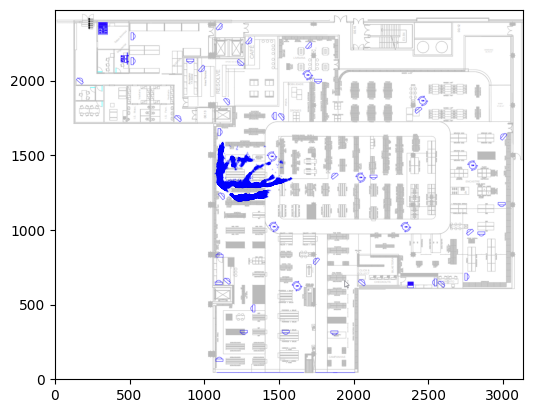

In [23]:
print_trajectory(frame, True)

## Com todas as cameras

In [24]:
my_list = os.listdir("C:/Users/diogo/Desktop/Tese/Dados/Trajetorias/14.03.2022/")
remove_words = ["teste", ".ipynb_checkpoints"]
camera_list = list(filter(lambda directory: directory not in remove_words, my_list))

data_from_cameras = []

for camera in camera_list:
    files = os.path.join("C:/Users/diogo/Desktop/Tese/Dados/Trajetorias/14.03.2022/" + str(camera), "*.csv")
    files = glob.glob(files)

    for filename in files:
        df1 = pd.read_csv(filename, low_memory=False, index_col=None, header=0)
        df1["camera"] = camera
        data_from_cameras.append(df1)

In [25]:
all_data = pd.concat(data_from_cameras, axis=0, ignore_index=True)
all_data.head()

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,xmin_track,ymin_track,...,xmax_real,ymax_real,frame_idx,Customer_id,time,x_frame,y_frame,x_floorplan,y_floorplan,camera
0,0,173.322418,298.714783,258.738098,476.472382,0.490883,0.0,person,173.0,298.0,...,258.738098,476.472382,1681,31.0,09:30:13,216.0,476.0,-363.551089,-47.156505,1.03
1,0,172.177002,296.251678,264.606384,472.565857,0.495701,0.0,person,175.0,296.0,...,264.606384,472.565857,1685,31.0,09:30:13,218.0,472.0,-363.526622,-47.101823,1.03
2,0,168.392349,296.885681,283.628845,471.694275,0.495246,0.0,person,181.0,296.0,...,283.628845,471.694275,1689,31.0,09:30:14,226.0,471.0,-363.473485,-47.141495,1.03
3,0,171.054672,301.844727,288.229431,473.483582,0.668843,0.0,person,186.0,300.0,...,288.229431,473.483582,1694,31.0,09:30:15,229.0,473.0,-363.460972,-47.197144,1.03
4,0,175.154572,295.096436,289.564270,471.141724,0.694716,0.0,person,188.0,296.0,...,289.564270,471.141724,1698,31.0,09:30:16,232.0,471.0,-363.435996,-47.184145,1.03


#### Projeção das coordenadas, colorido por cliente

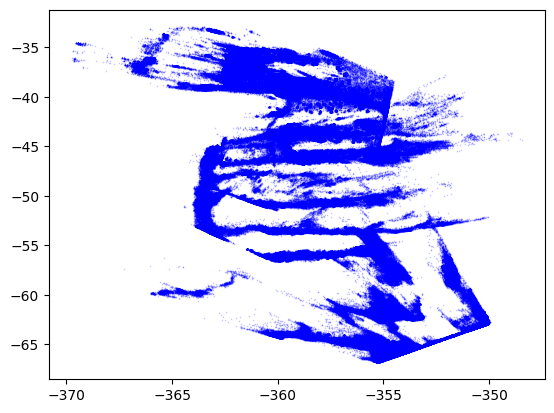

In [33]:
print_trajectory(all_data, False)

In [27]:
def print_trajectory_percamera(df, plant):
    if plant is True:
        img = plt.imread("/Users/chainz/Desktop/Tese/Dados/mapa original.png")
        fig, ax = plt.subplots()
        ax.imshow(img)
    
    for camera in df["camera"].unique():
        camera_data = df[df["camera"] == camera]
        plt.scatter(camera_data["x_floorplan"], camera_data["y_floorplan"], s=0.1, marker="o", color=get_color(camera))
    plt.savefig('C:/Users/diogo/Desktop/Tese/Resultados/firstanalysis_mapamodificado.png', dpi=1200)
        
def get_color(camera):
    if camera == "1.03":
        return "#FD0100" #vermelho
    elif camera == "1.04":
        return "#F76915" #laranja
    elif camera == "1.05":
        return "#EEDE04" #amarelo
    elif camera == "2.05":
        return "#2FA236" #verde
    elif camera == "2.11":
        return "#333ED4" #azul

#### Projeção das coordenadas, colorido por camera

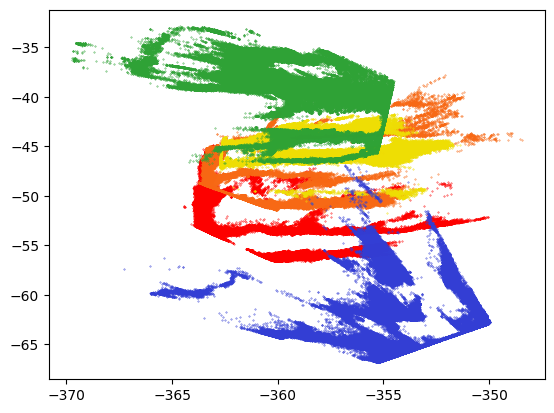

In [28]:
print_trajectory_percamera(all_data, False)

In [29]:
print_trajectory_percamera(all_data, True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/chainz/Desktop/Tese/Dados/mapa original.png'

## Conclusões: